In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
np.random.default_rng(42)
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

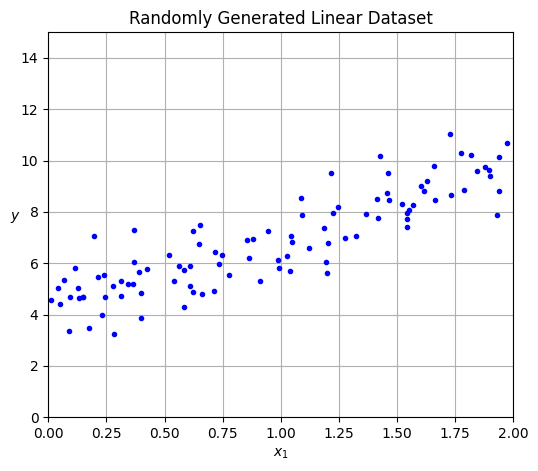

In [3]:
plt.figure(figsize=(6, 5))
plt.plot(X, y, 'b.')
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.title("Randomly Generated Linear Dataset")
plt.axis([0,2,0,15])
plt.grid()
plt.show()

Normalize Equation for fitting Line

In [4]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)
theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [5]:
theta

array([[4.21509616],
       [2.77011339]])

In [6]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta
y_predict

array([[4.21509616],
       [9.75532293]])

Visual this prediction

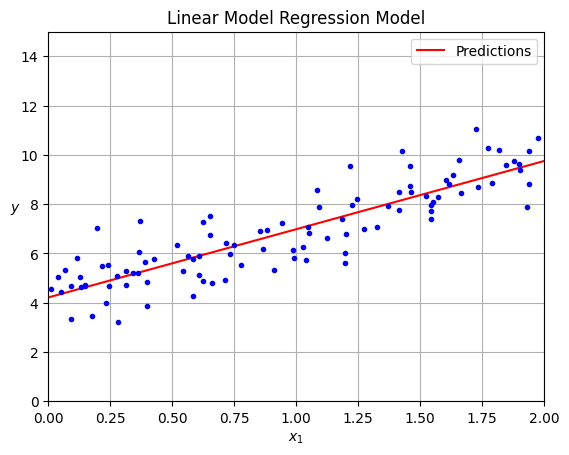

In [7]:
plt.plot(X_new, y_predict, 'r-', label="Predictions")
plt.plot(X, y, 'b.')
plt.axis([0,2,0,15])
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.title("Linear Model Regression Model")
plt.grid()
plt.legend()
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X, y)
linear_reg.intercept_, linear_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [9]:
linear_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

Linear Regression is class based function of scipy.linalg.lstsq(), stands for "Least Squares"

In [10]:
# This is as:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

# Gradient Descent
## Batch Gradient Descent

* Gradient vector of cost function
* Gradient descent step

In [28]:
eta = 0.1 # Learning Rate
n_epochs = 1000
m = len(X_b) # number of instances 

np.random.default_rng(42)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [12]:
theta

array([[4.21509616],
       [2.77011339]])

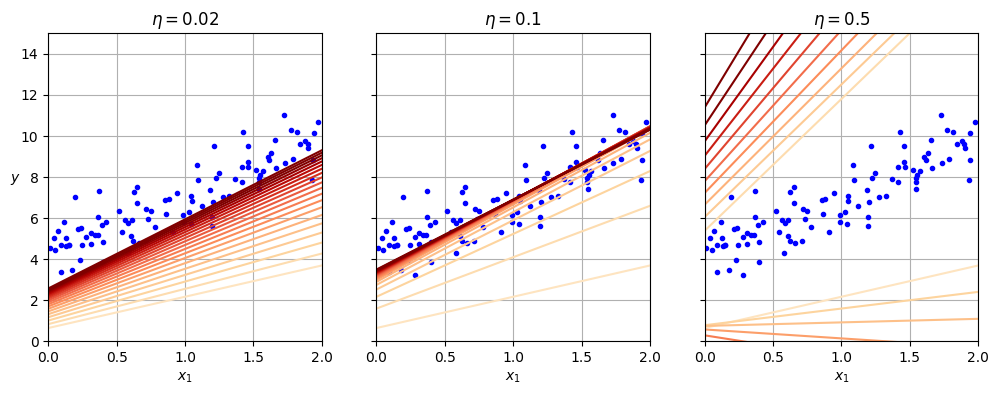

In [26]:
import matplotlib as mpl

def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta 
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, color=color, linestyle='solid')
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis([0,2,0,15])
    plt.grid()
    plt.title(fr'$\eta= {eta}$')
    return theta_path

np.random.default_rng(42)
theta = np.random.randn(2, 1)

plt.figure(figsize=(12, 4))

plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel('$y$', rotation=0)

plt.subplot(132)
plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])

plt.subplot(133)
plt.gca().yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.5)

plt.show()
